<h1>The Tesla Stock Price -- From 06/29/2017 to 03/17/2017</h1> 

--------------------------

<h3>The Universal Workflow of Machine Learning</h3>

<p>
1. Defining the problem and assembling a dataset<br>
2. Choosing the measure of success<br>
3. Deciding on an evaluation protocol<br>
4. Preparing the dataset<br>
5. Developing a model that does better than a baseline<br>
6. Scaling up: developing a model that overfits<br>
7. Regularising the overfitting model and tuning the hyperparameters<br>
8. Retraining the network with the entire training set and evaluating on the unseen test set
</p>

<h3>Defining the problem and assembling a dataset</h3>

--------------------------
Dataset downloaded and included with the note from:<a href="https://www.kaggle.com/datasets/rpaguirre/tesla-stock-price?resource=download">Click to visit kaggle</a>

<h4>Content</h4>
Within the dataset, one will encounter the following:

<ul>
    <li>The date - "Date"</li>
    <li>The opening price of the stock - "Open"</li>
    <li>The high price of that day - "High"</li>
    <li>The low price of that day - "Low"</li>
    <li>The closed price of that day - "Close"</li>
    <li>The number of stocks traded during that day - "Volume"</li>
    <li>The stock's closing price has been amended to include any distributions/corporate actions that occur before the next day open - "Adj[usted] Close"</li>
</ul>

<h3>Hypotheses </h3>

--------------------------
<br>The following hypotheses were made:</br>
<br>That the outputs can be predicted from the inputs</br>
<br>The available data is sufficiently informative to learn the relationship between inputs and outputs.</br>


<h3>Methodology</h3>

-------------------------
For this project, I will be using linear regression to predict the stock's high price, excluding the Volume data as it has not much correlated with any of the other features. I will demonstrate different techniques and training skills using regression, identifying overfitting, underfitting and finding the best fits to calculate mae.

The reason for using regression is commonly used to predict a continuous value such as stock prices, temperature, etc., given meteorological data or predict the time that a software project will take to complete given its specifications. //Deep learning with python second edition, page 113, 4.3 Predicting house prices: a regression example//


<h3>Preparing the dataset</h3>

-------------------------

In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

SEED=1
np.random.seed(SEED)
tf.random.set_seed(SEED)

import keras
from tensorflow.keras import models
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Read the CSV file using pandas:

In [47]:
# Load the data from csv
df = pd.read_csv('D:\\jupyter\\assignment\\Tesla.csv',parse_dates= True, index_col="Date") 
#Because i am running in anaconda environment i set a specific path, 
#please change to "Tesla.csv", if you running locally within the same folder e.g. if you use google colab
#df = pd.read_csv('Tesla.csv',parse_dates= True, index_col="Date") 

Check the data set for type, null values and outliers.

In [48]:
# df.dtypes
# df.head()
# df.describe() #check for outliers
# df.info() #check for null values

Create a Heatmap of the correlation between the features within the dataset<br>

From the heatmap below, it is clear that the Adj Close is highly correlated with the Close, Open, High and Low. This is expected as the Adj Close is the closing price that has been amended to include any distributions/corporate actions that occur before the next day's open. The Volume is not correlated with any of the other features.

<AxesSubplot:>

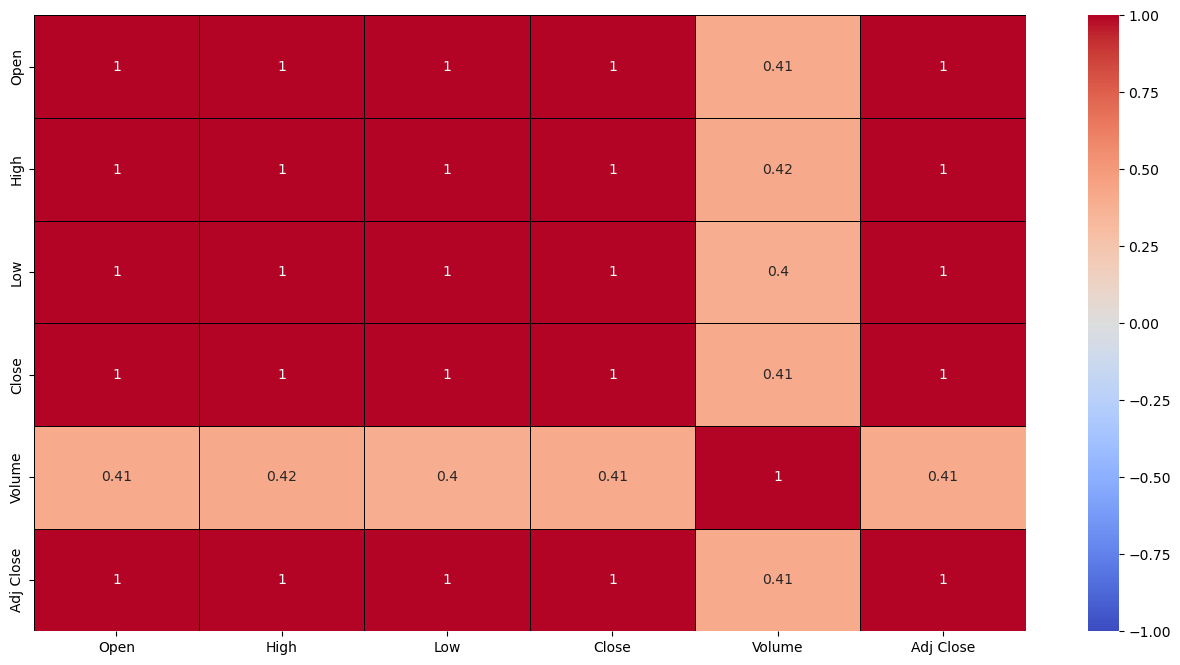

In [49]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black')

Creating box plots to check for outliers<br>
The result below shows that there are no outliers based on the heatmap in the dataset

<AxesSubplot:>

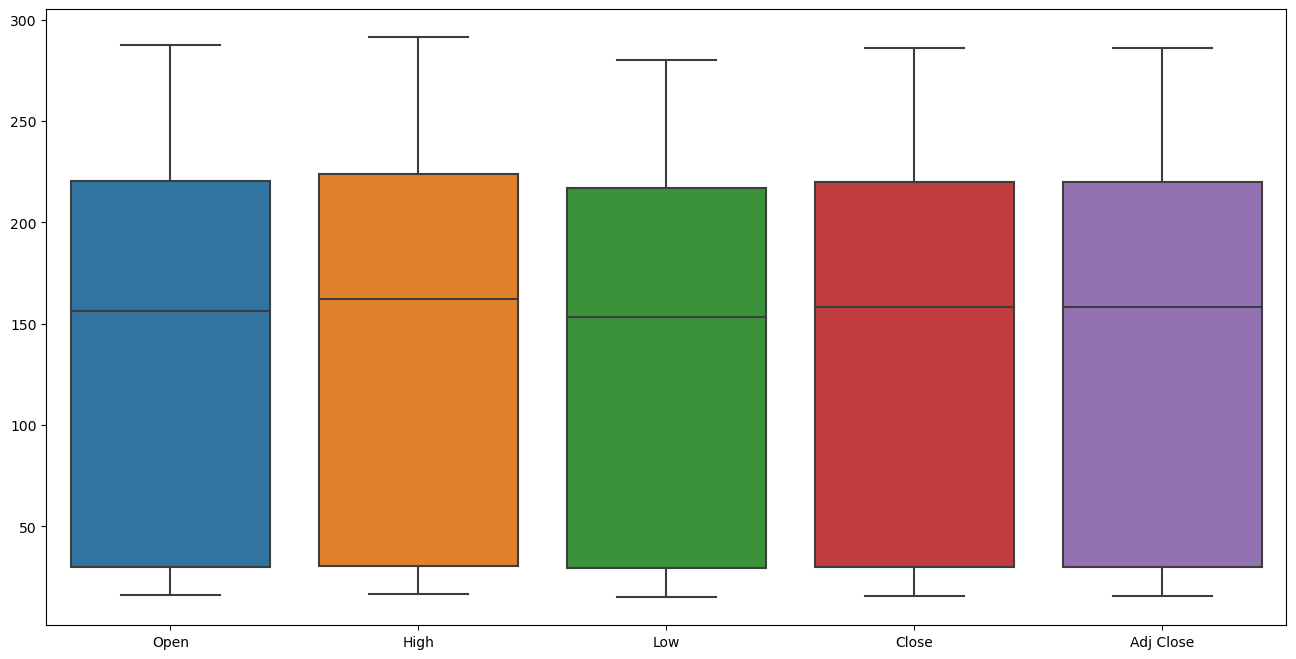

In [50]:
plt.figure(figsize=(16,8))
important_features = ['Open', 'High', 'Low', 'Close', 'Adj Close'] #select the features
sns.boxplot(data=df[important_features])

Plot the data to see the trend of the stock price to check any linear relationship between the features and the target<br>
The result below shows that there is a linear relationship between the features and the target except for the Volume, which is not linearly related to the target, and proven that the Volume is not correlated with any of the other features.<br>
We will drop the Volume feature from the dataset.

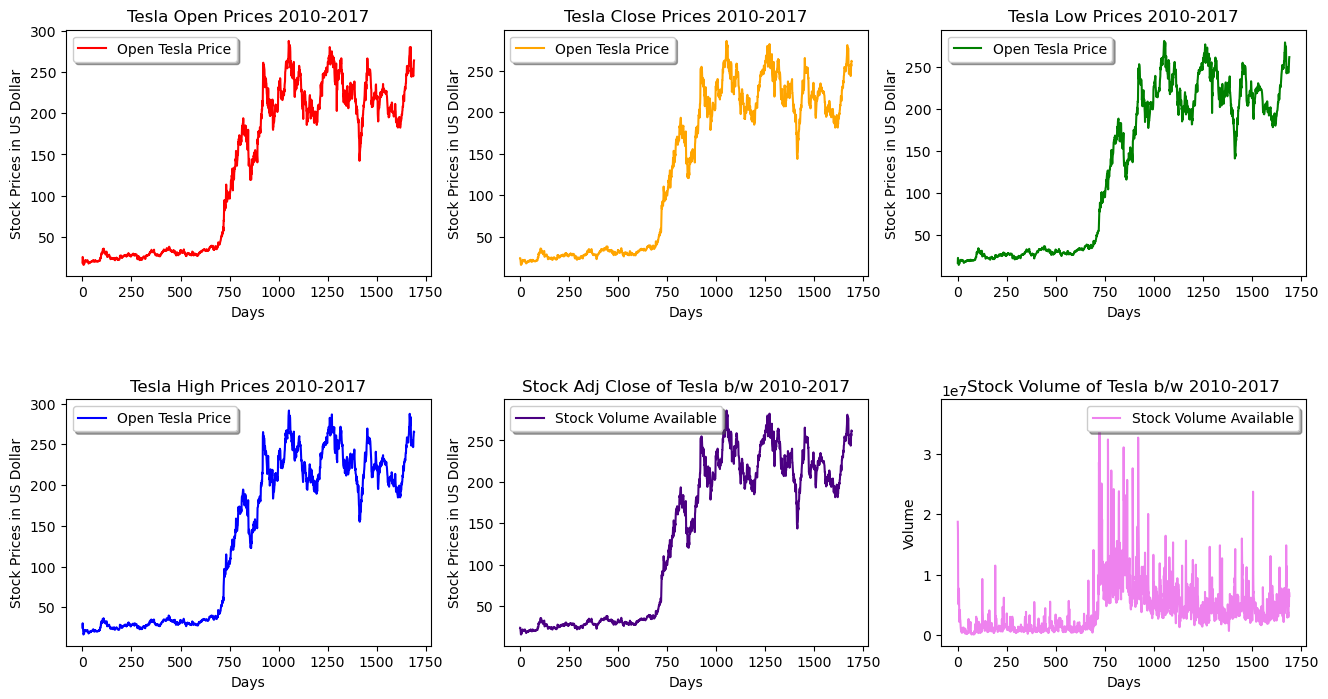

In [51]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
# open
plt.subplot(2,3,1) #2 rows, 1 column, 1st plot
plt.plot(df.Open.values, color = "red", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Open Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# close
plt.subplot(2,3,2) #2 rows, 1 column, 1st plot
plt.plot(df.Close.values, color = "orange", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Close Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# low
plt.subplot(2,3,3) #2 rows, 1 column, 1st plot
plt.plot(df.Low.values, color = "green", label = "Open Tesla Price") #plot the open price
plt.title("Tesla Low Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# high
plt.subplot(2,3,4) #2 rows, 1 column, 1st plot
plt.plot(df.High.values, color = "blue", label = "Open Tesla Price") #plot the open price
plt.title("Tesla High Prices 2010-2017") #set the title
plt.xlabel("Days") #set the x label
plt.ylabel("Stock Prices in US Dollar") #set the y label
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# adj close
plt.subplot(2,3,5) #2nd plot
plt.plot( df['Adj Close'].values, color = "indigo", label = "Stock Volume Available")
plt.title("Stock Adj Close of Tesla b/w 2010-2017")
plt.xlabel("Days")
plt.ylabel("Stock Prices in US Dollar")
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# volume
plt.subplot(2,3,6) #2nd plot
plt.plot( df.Volume.values, color = "violet", label = "Stock Volume Available")
plt.title("Stock Volume of Tesla b/w 2010-2017")
plt.xlabel("Days")
plt.ylabel("Volume")
plt.legend(loc = "best",ncol = 2,shadow = True) #set the legend

# plot the data
plt.show()


<h3>Build a baseline model</h3>

-------------------------
I have defined a base model function for the baseline model, following the example build mode from page 115, 4.3.3 Building your model as a starting point.

The build_model contains three layers, two hidden layers and one output layer. The first hidden layer has 64 units, and the second has 64 units. The output layer has 1 unit. The reason for the end model with a single unit and no activation as it will be a linear layer. According to the book, this is a typical setup for scalar regression.

A sigmoid activation function to the last layer is not used because it will constrain the output to predict values between 0 and 1. The book states that the last layer should be linear so that the model can predict values in any range.

The activation function for the first two layers is relu, and the activation function for the output layer is linear. The loss function is mean_squared_error, and the optimizer is rmsprop.

Mean squared error (MSE) is the square of the difference between the predictions and the targets. It is a commonly used loss function for regression problems.

The use of matrix monitoring is mean_absolute_error. The reason for using this is to monitor the training and validation mean absolute error during training. This is done by passing the metrics argument in the compile method.

<h3>Normalizing the data with sklearn</h3>

-------------------------

Sklearn is a Python library for machine learning. It features various classification, regression and clustering algorithms, including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. //Wikipedia//

I have used a technique called Dimensionality Reduction. The number of input variables or features for a dataset is called dimensionality.

Why dimensionality reduction?
In the original high-dimensional space, redundant information and noise information are included, which will introduce errors in practical applications and affect the accuracy rate. At the same time, dimensionality reduction can extract the essential structure inside the data and reduce errors caused by redundant information and noise information. Improve precision in applications. The intuitive benefit is that the dimensions are reduced, which is convenient for calculation and visualisation. Its more profound significance lies in extracting and synthesising adequate information and rejecting useless information. Therefore, dimensionality reduction is an essential step in data preparation which the above heatmap can prove; volume is less correlated with any of the other features. 

In [52]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create a scaler object
x = df.drop(['High','Volume'], axis=1) #drop the features that we don't need
y = df['High'] #set the target variable
# print(x)
# print(y)

Split the dataset to train,cross validate, test in ratio of 80% + 10% + 10% 

In [53]:
# from sklearn.model_selection import train_test_split

#Split the data into 80% training and 10% testing and 10% validation
#first split the data into 80% training and 20% remaining
x_train,x_remaining,y_train,y_remaining= train_test_split(x,y,test_size=0.2,random_state=3)

#then split the remaining data into 50% testing and 50% validation of the remaining data which is 20% of the original data
x_validation,x_test,y_validation,y_test= train_test_split(x_remaining,y_remaining,test_size=0.5,random_state=3)

# training set
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_validation = x_validation.to_numpy()

# target/lables set
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_validation = y_validation.to_numpy()

#check the shape of the data
# print("x_train shape",x_train.shape)
# print("x",x_train)
# print("y_train shape",y_train.shape)
# print("y",y_train)

# print("x_validation shape",x_validation.shape)
# print("x_val",x_validation)
# print("y_validation shape",y_validation.shape)
# print("y_val",y_validation)

# print("x_test shape",x_test.shape)
# print("x_test",x_test)
# print("y_test shape",y_test.shape)
# print("y_test",y_test)

Function to build the model

In [54]:
#from tensorflow.keras import models
#from tensorflow.keras import layers

def build_baseline_model(): #build the model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))
    
    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model

Function to train the build model with the train data

In [55]:
def train_Model(model,epochs):
    
    #train the model
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_validation,y_validation),
        epochs=epochs, batch_size=512, verbose=0, 
    )
    return history.history

Run Baseline Training:<br>
The number of iterations over the entire x and y data provided, to start with, I have used 500 epochs to see how the model performs.<br>
<li>epochs 500</li> <br>
The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters. In this assignment, 512 will be used throughout the project for fast training.<br>

<li>batch_size 512</li>

In [56]:
baseModel = build_baseline_model() #build the model using the function
baseline= train_Model(baseModel,500) #train the model

Use .keys() to check the keys catorgories of the data set making sure that the data set is split correctly.

In [57]:
#key
#baseline.keys()

Define a function to plot the training and validation mae values from the history object returned by the model.fit method for easy plotting in the future.

In [58]:
def plot_mae(history,range,title): #plot the mae
    plt.figure(figsize=(16,8))
    plt.title(title)
    plt.ylabel('Validation mae')
    plt.xlabel('Epochs')
    plt.plot(history['mae'][:range], label='Training mae', color='red')
    plt.plot(history['val_mae'][:range], label='Validation mae', color='green')
    # set x interval to 1
    plt.xticks(np.arange(0, range, 1.0))

    plt.legend(
        loc='upper right',
        shadow=True,
        fontsize='x-large'
    )
    plt.show()

Plot the training and validation mae values of the baseline model

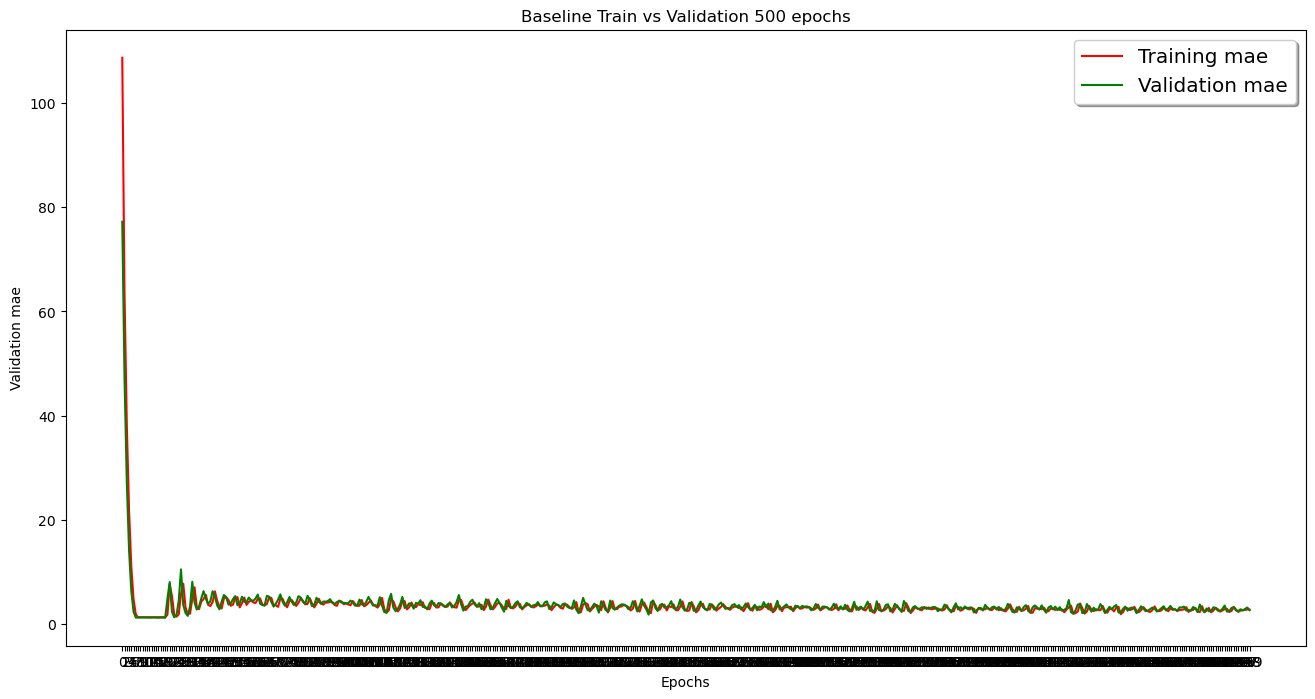

In [59]:
plot_mae(baseline,500,"Baseline Train vs Validation 500 epochs") #plot the mae of the model

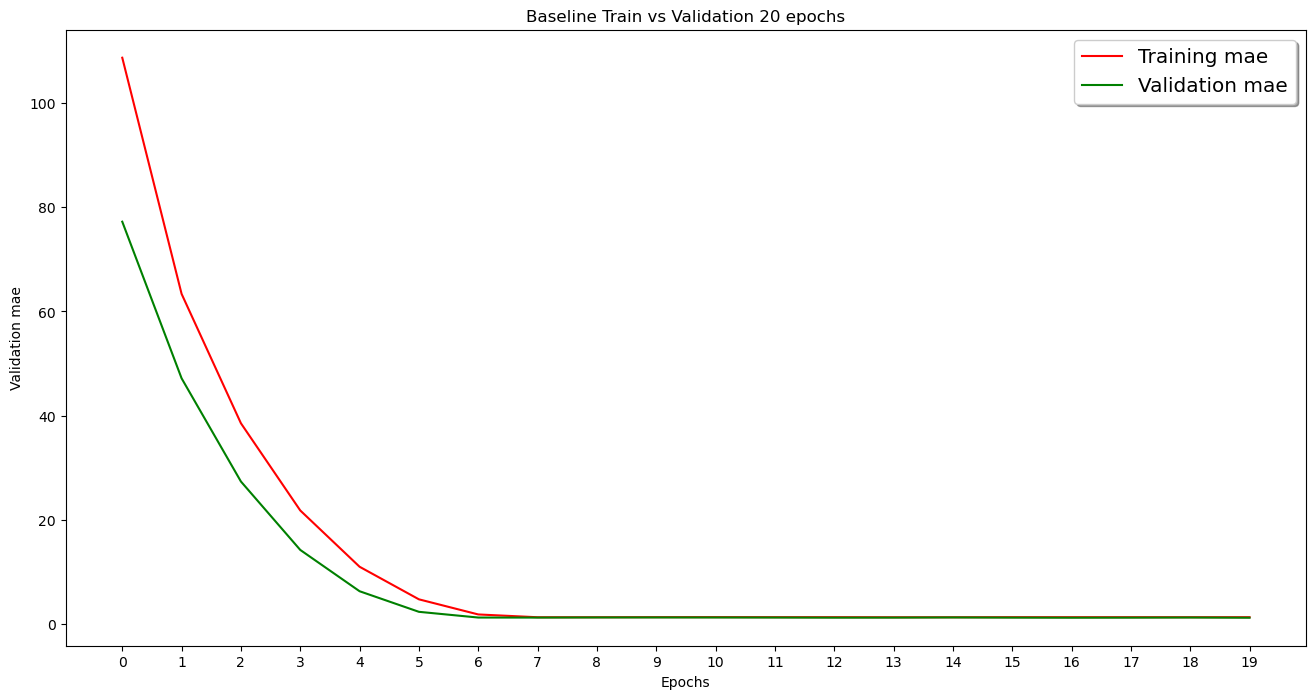

In [60]:
plot_mae(baseline,20,"Baseline Train vs Validation 20 epochs") #plot the mae of the model

Calculate the prediction of mean absolute error of the baseline model against the test set <br>
Using sklearn.metrics.mean_absolute_error

In [61]:
# from sklearn.metrics import mean_squared_error
baselineMse = mean_squared_error(y_test, baseModel.predict(x_test))
print("Baseline test MSE: ", baselineMse)

6/6 [==============================] - 0s 5ms/step
Baseline test MSE:  11.998242845196847


From above, the baseline of 500 epochs graph shows that the model is underfitting at first and shows overlapping/no-till 15. The model shows an overfitting sign from epoch 15, but up to epoch 500, the model continues to show no improvement. The baseline model training with 500 epochs overfitted the model.
<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
</table>

Baseline Train vs Validation 20 epochs from above show clear results. The training mae is decreasing with every epoch, and the validation mae is increasing with every epoch.<br>
The best practice is to stop training early as it shows no improvements.</br>
My next step is to train a new model with 10 epochs. This is called early stopping.</br>
I have chosen 10 epochs; that's when the model start to have a clear sign of change. As what best fits defined in the book, finding the best balance between underfitting and overfitting. In this case, I chose the middle point of 10.
<li>Epoch with 10</li>

<h3>Early Stopping</h3>

-------------------------

Early stopping Train vs Validation 10 epochs from above shows a clearer result. The training mae is decreasing with every epoch, and the validation mae is increasing with every epoch.<br>

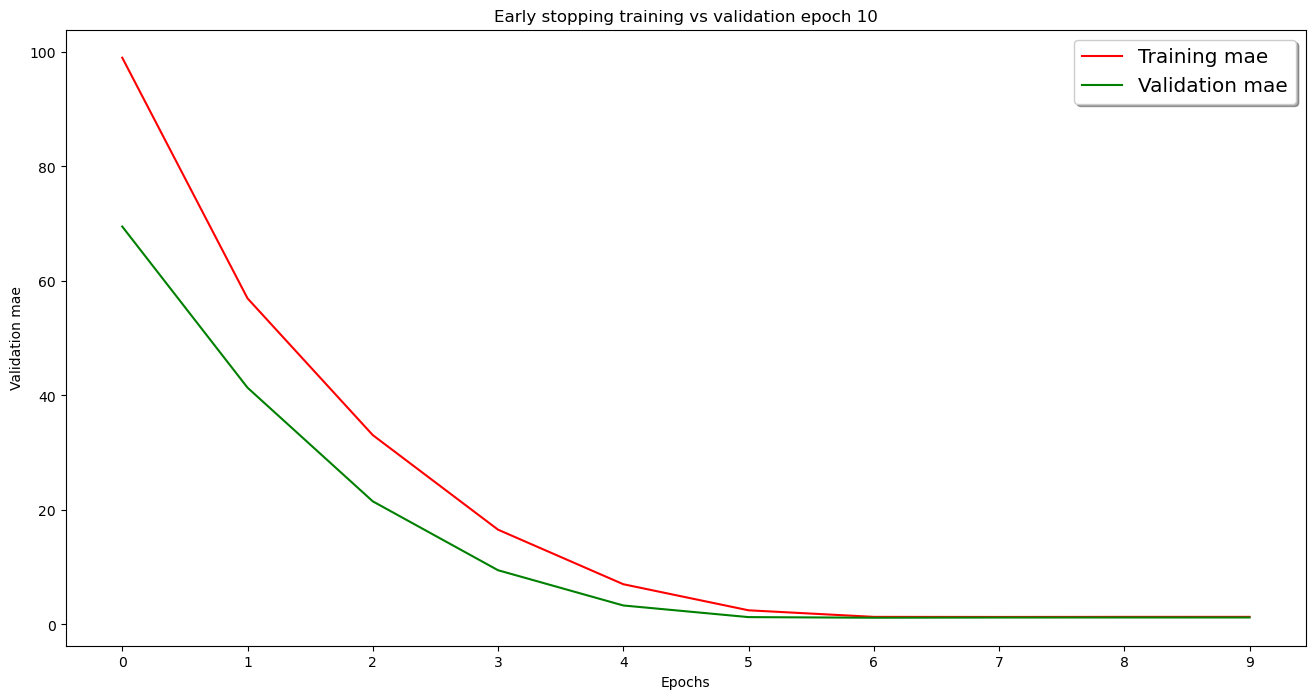

In [204]:
baseModelv2 = build_baseline_model() #build the model using the function
earlyStop=train_Model(baseModelv2,10)
plot_mae(earlyStop,10,"Early stopping training vs validation epoch 10") #plot the maes


Test prediction mae(2dp) of the early stopping model against the test set <br>

In [94]:
earlyStopMAE = mean_squared_error(y_test, baseModelv2.predict(x_test))
print("Early stopping test MSE: ", earlyStopMAE)

6/6 [==============================] - 0s 5ms/step
Early stopping test MSE:  4.544317482508839


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
</table>

The result shows that by early stop, the model can reduce the mean absolute error from 12.00 to 4.54. This is a vast improvement even though the model layers and activation function are the same. 

The next step is to try k-fold cross-validation to see if the model can be improved further.

<h3>K-fold function</h3>

-------------------------

K-fold is commonly used to prevent the problem of overfitting in the training process, dividing the data into training and test set. In order to achieve the generalization performance of the network. The data is utilized in k-fold multiple division; the average is reasonably representative of the model performance.

At the same time, it is also recommended to only use K-fold when the total amount of data is small; hence, other methods cannot continue to improve performance, so K-Fold is recommended. In other cases, it is not recommended to use K-fold if the amount of data is too large; there is no need for more training data because the training cost will increase by K times (mainly referring to the training time).

I will use demonstrate k-fold cross-validation with 4 folds; however, it will not be included in the final table
Common values are k=4, k=5
<li>K = 4</li>
<li>Epoch with 10</li>

CustomCallback

In [95]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, epochs):
        super(tf.keras.callbacks.Callback, self).__init__()
        self.epochs = epochs
    def on_epoch_begin(self, epoch, logs=None):
        c = ['|', '/', '-', '\\'] 
        print(f"\r{c[epoch % 4]} epoch: {epoch+1}/{self.epochs}", end="")
    def on_train_end(self, logs=None):
        print()

Define K-fold function validation

In [98]:
def kfold(k,epochs,buildModel): #kfold cross validation 
    K = k
    num_val_samples = len(x_train) // K
    num_epochs = epochs
    all_mae_histories = []
    for i in range(K):
        print('processing fold', i)
        
        # Prepare the validation data: data from partition i
        a, b = i * num_val_samples, (i + 1) * num_val_samples
        val_data = x_train[a : b]
        val_targets = y_train[a : b]
        
        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate([x_train[:a], x_train[b:]], axis=0)
        partial_train_targets = np.concatenate([y_train[:a], y_train[b:]], axis=0)

        # Build the Keras model (already compiled)
        model = buildModel# baseline model
        
        # Train the model (in silent mode, verbose=0)
        history = model.fit(
            partial_train_data,
            partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=512, verbose=0, 
            callbacks=[CustomCallback(num_epochs)]
        )

        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    return all_mae_histories

Define smooth curve function 

In [90]:
def smooth_curve(points, beta = 0.9):       # beta must be between 0 and 1!
    smoothed_points = []
    for current in points:
        if smoothed_points:                 # (an nonempty list is 'True')
            previous = smoothed_points[-1]  # the last appended point
                                            # ↓ a weighted sum of previous & point, controlled by beta
            smoothed_points.append(beta * previous + (1 - beta) * current)
        else:
            smoothed_points.append(current) # at the start, the list is empty, we just add the first point
    return smoothed_points

Use the K-fold function to train the baseline model with 10 epochs

In [129]:
#call the kfold function
k4 = kfold(4,500,baseModel)

processing fold 0
\ epoch: 500/500
processing fold 1
\ epoch: 500/500
processing fold 2
\ epoch: 500/500
processing fold 3
\ epoch: 500/500


Take the mean of all 4 folds for each epoch

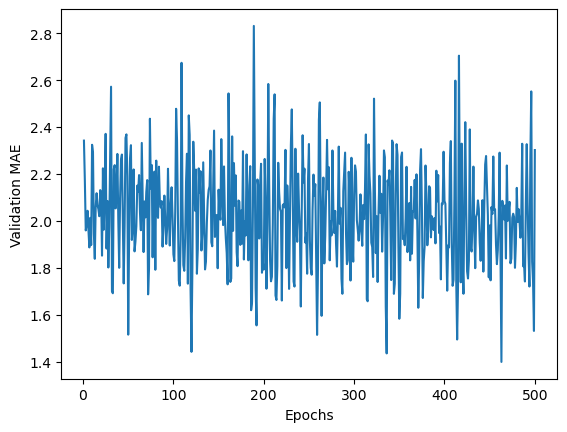

In [130]:
average_mae_history = np.array(k4).mean(axis=0)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

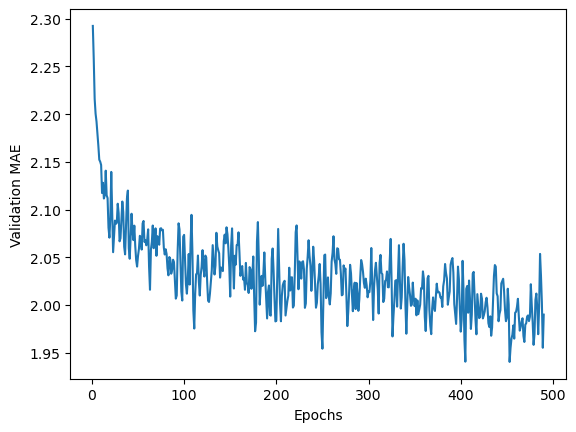

In [131]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

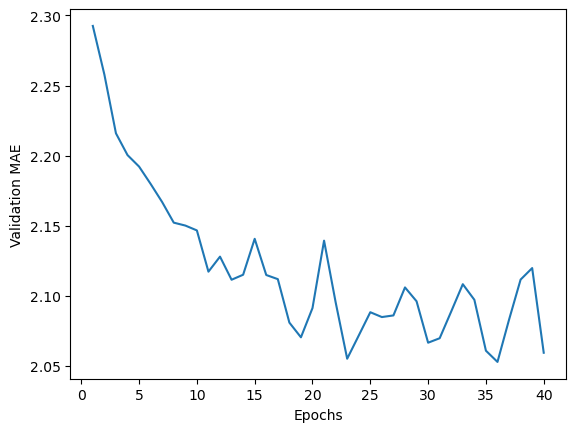

In [137]:
smooth_mae_history = smooth_curve(average_mae_history[10:50])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

As you can see from the above graph, validation MAE stops improving  after 23-25 epochs(this number includes the ten epochs we omitted from the beginning pass that point, the model stop improves.

<h3>Experimenting with model layers</h3>

-------------------------
<h4>Reduce layers</h4>

Reduce the number of layers to 1 hidden layers and 1 output layer. The first hidden layer has 64 units. The output layer has 1 unit. 


In [139]:
def build_reduced_model(): #build the model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))
    
    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model

In [140]:
reduceLayerModel = build_reduced_model() #build the model using the function
reduceLayer = train_Model(reduceLayerModel,500) #train the model with 500 epochs

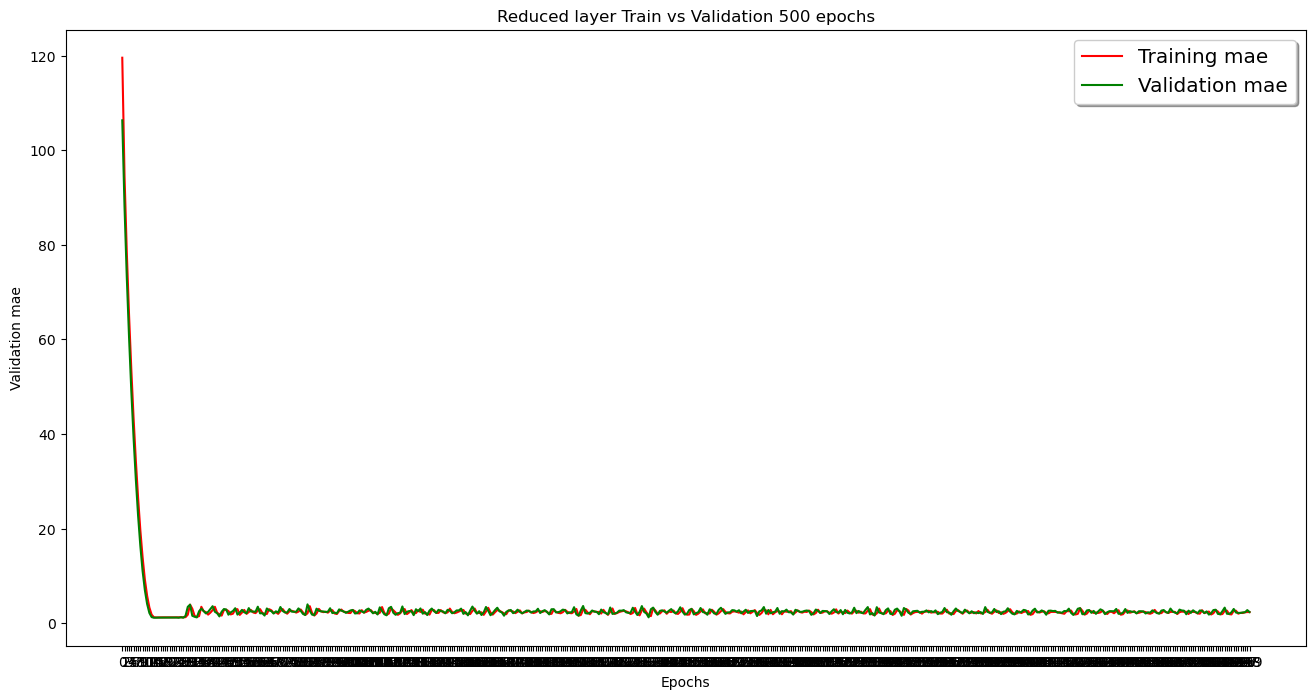

In [141]:
plot_mae(reduceLayer,500,"Reduced layer Train vs Validation 500 epochs") #plot the mae of the model

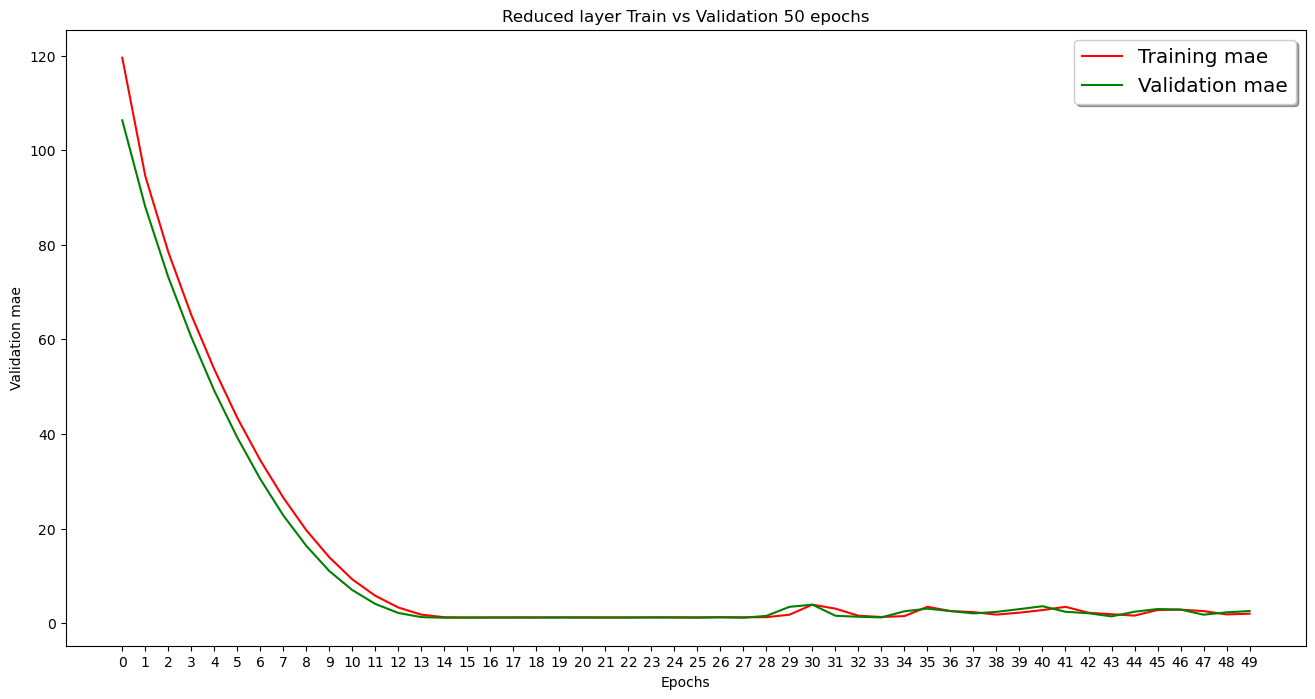

In [144]:
plot_mae(reduceLayer,50,"Reduced layer Train vs Validation 50 epochs") #plot the mae of the model

In [148]:
reduceLayerMSE = mean_squared_error(y_test, reduceLayerModel.predict(x_test))
print("Reduced layer test MSE: ", reduceLayerMSE)

6/6 [==============================] - 0s 2ms/step
Reduced layer test MSE:  10.211155886472989


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.21</td>
</table>

As you can see from the above graphs, the 500 epoch shows underfitting throughout the training and validation MAE due to the scaling problem. Once we zoom in to 50 epochs, we can see that the model starts to overfit around 28 epochs and shows no improvement. However, as we can see from the table above, by reducing the number of layers to 1 hidden layer and one output layer with 500 epochs, the model performance is still better than the baseline model but worse than the early stopping baseline model. The next step is to train the model with 21 epochs as the best fit to see if the model can be improved further. 

Reduce layer and early stop 21 epochs

In [225]:
reduceLayerEarlyStopModel = build_reduced_model() #build the model using the function
reduceLayerEarlyStop = train_Model(reduceLayerEarlyStopModel,21) #train the model with 500 epochs
reduceLayerEarlyStopMSE = mean_squared_error(y_test, reduceLayerEarlyStopModel.predict(x_test))
print("Reduced layer early stopping test MSE: ", reduceLayerEarlyStopMSE)

6/6 [==============================] - 0s 2ms/step
Reduced layer early stopping test MSE:  10.13398520212089


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.21</td>
  </tr>
  <tr>
    <td>Reduce layers and early stop</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.13</td>
</table>

The above table shows that the model performance is still better than the baseline and the reduce layer model but worse than the early stopping baseline model. However, the improvement is not significant.

<h4>Increase layers:</h4>
Increase the number of layers to 3 hidden layers and 1 output layer. The output layer is still 1 unit. 

In [226]:
def build_increase_model(): #build the model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(64, activation = 'relu',input_shape=(x_train.shape[1],))) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1))

    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model


In [227]:
increaseLayerModel = build_increase_model() #build the model using the function

In [228]:
increaseLayer = train_Model(increaseLayerModel,500) #train the model with 500 epochs

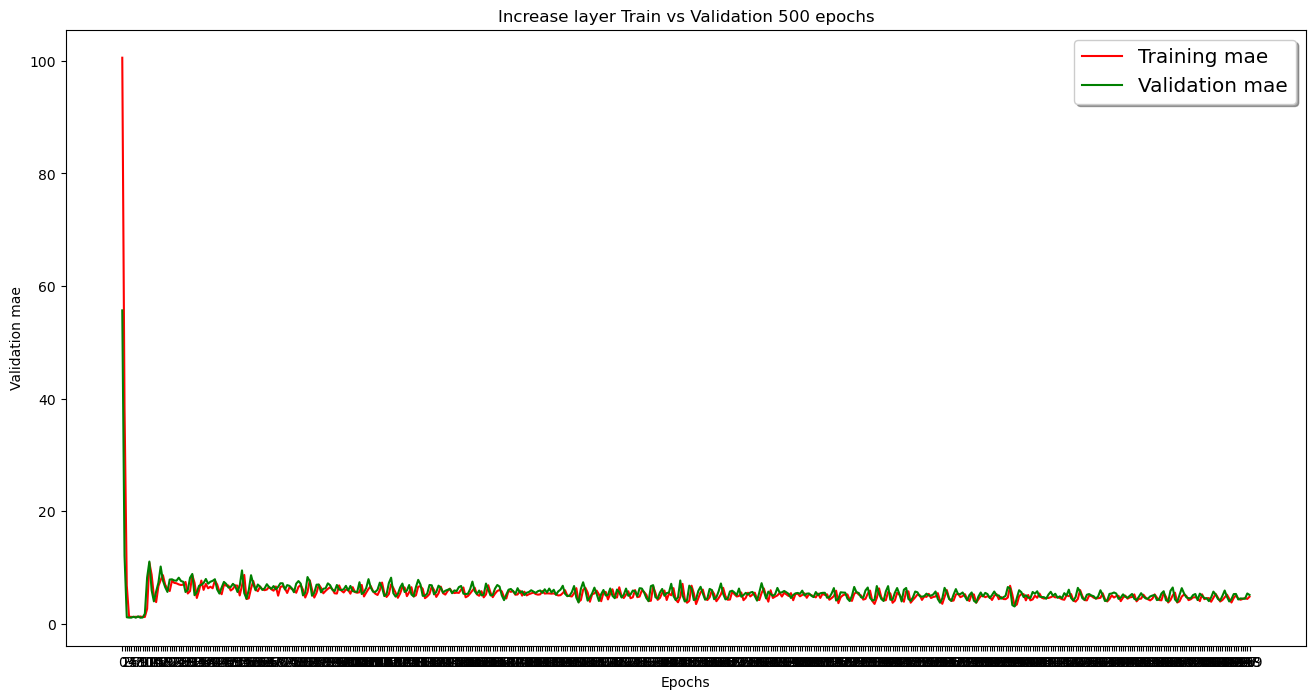

In [229]:
plot_mae(increaseLayer,500,"Increase layer Train vs Validation 500 epochs") #plot the mae of the model

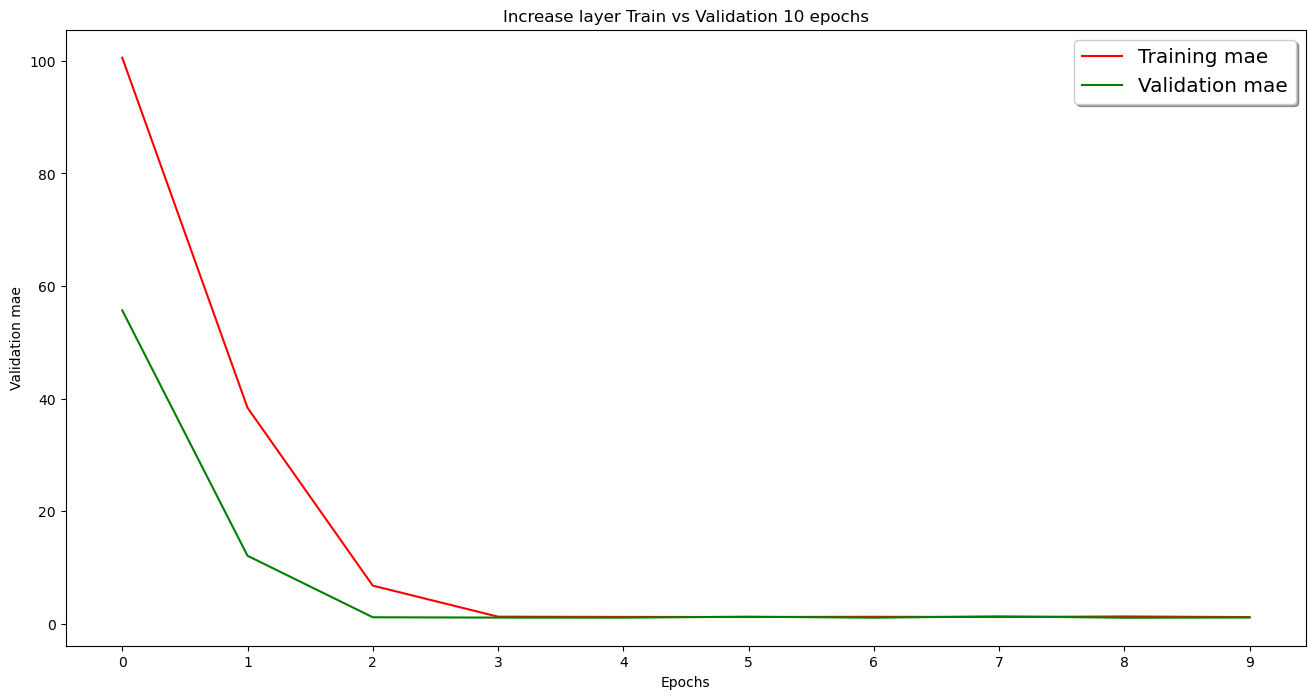

In [230]:
plot_mae(increaseLayer,10,"Increase layer Train vs Validation 10 epochs") #plot the mae of the model

In [239]:
increaseLayerMSE = mean_squared_error(y_test, increaseLayerModel.predict(x_test))
print("Increase layer test MSE: ", increaseLayerMSE)

6/6 [==============================] - 0s 5ms/step
Increase layer test MSE:  38.693460868769044


<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.21</td>
  </tr>
  <tr>
    <td>Reduce layers and early stop</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.13</td>
  <tr>
    <td>Increase layers</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>4</td>
    <td>24.00</td>
  </tr>

</table>

The result shows that by increasing the layers, the model can improve with fewer epochs compared to the baseline model, starting to show improvement around six epochs. In contrast, before, it was around ten epochs. However, training with 500 epochs is overfitting the model. From the table, it is clear to see that it is showing worse performance. The next step is to reduce the number of epochs to 6 for the best fit. The next step is to reduce the number of epochs to 4 for best fit to see if it can improve the model performance with the same number of layers.

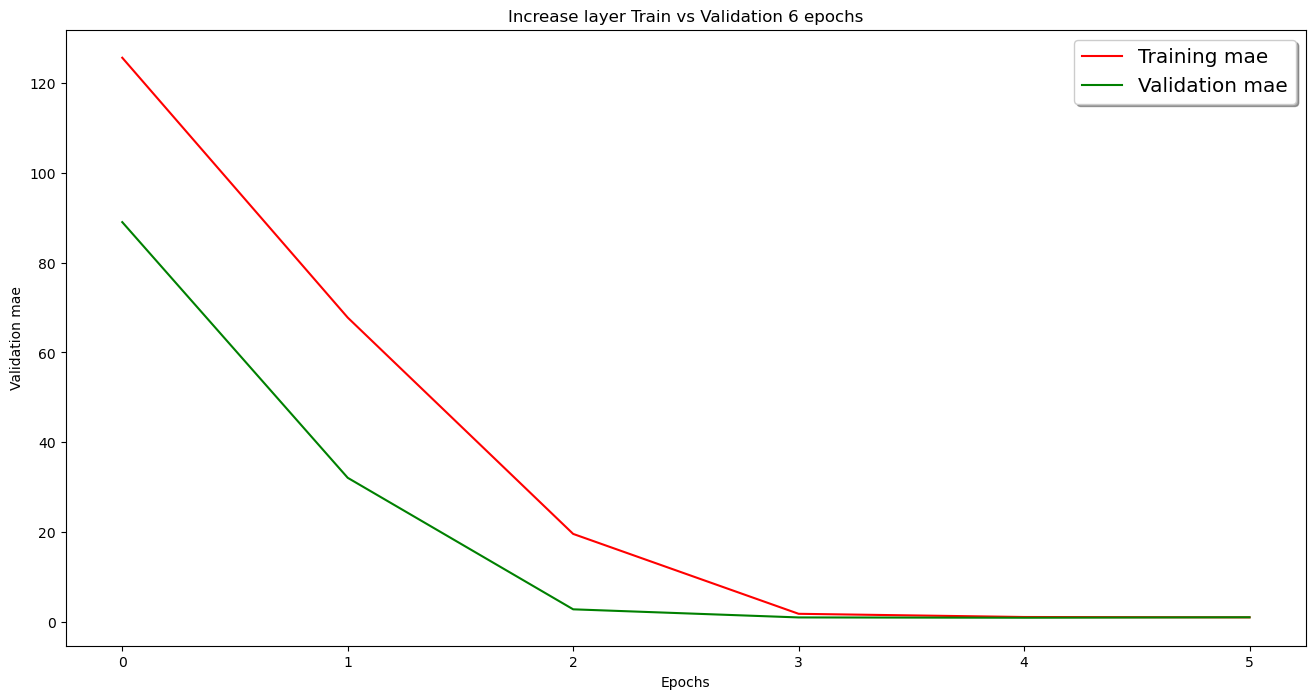

6/6 [==============================] - 0s 3ms/step
Increase layer test MSE:  2.209732578340416


In [245]:
increaseLayerEarlyStopModel = build_increase_model() #build the model using the function
increaseLayerEarlyStopResult = train_Model(increaseLayerEarlyStopModel,6) #train the model with 4 epochs
plot_mae(increaseLayerEarlyStopResult,6,"Increase layer Train vs Validation 6 epochs") #plot the mae of the model
increaseLayerMSE = mean_squared_error(y_test,increaseLayerEarlyStopModel.predict(x_test) )
print("Increase layer test MSE: ", increaseLayerMSE)

<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>10.21</td>
  </tr>
  <tr>
    <td>Reduce layers and early stop</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.13</td>
  <tr>
    <td>Increase layers</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>24.00</td>
  </tr>
  <tr>
    <td>Increase layers early stop</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>6</td>
    <td>2.21</td>
  </tr>

</table>

The table shows that the performance improved significantly by early stopping with increased layers, outperforming all the models with a test prediction mse of 2.21. This is a significant improvement from the baseline model from 12.00 to 2.21. 

<h3>Experiment with neurons</h3>

---         

In this section, I will use the initial base model configuration layers and increase the number of neurons in each layer to see if it can improve the model performance. 

Increase neurons in first hidden layers:

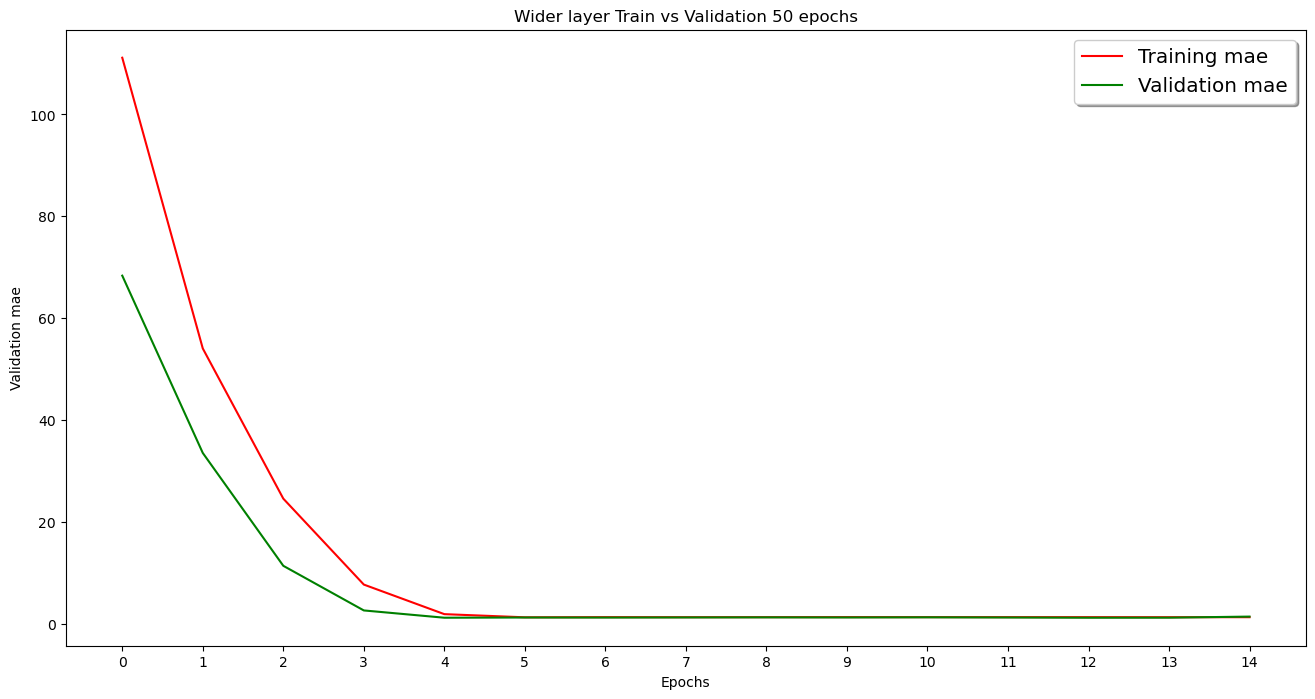

6/6 [==============================] - 0s 2ms/step
Wider layer test MSE:  3.6658245177883266


In [250]:
def build_wider_model(): #build the model
    model = models.Sequential() # create a sequential model
    model.add(layers.Dense(512, activation = 'relu',input_shape=(x_train.shape[1],))) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(64, activation = 'relu')) # add a dense layer with 64 neurons and relu activation function
    model.add(layers.Dense(1)
    )
    model.compile( #compile the model
        optimizer = 'rmsprop', # use rmsprop optimizer
        loss='mse', #loss function
        metrics=['mae'], #metrics
    )
    return model

widerModel = build_wider_model() #build the model using the function
widerResult = train_Model(widerModel,15) #train the model with 15 epochs
plot_mae(widerResult,15,"Wider layer Train vs Validation 50 epochs") #plot the mae of the model

widerMSE = mean_squared_error(y_test, widerModel.predict(x_test))
print("Wider layer test MSE: ", widerMSE)

<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
    <th>Nuerons in each layer</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
    <td>64,64,1</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
    <td>64,64,1</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>10.21</td>
    <td>64,1</td>
  </tr>
  <tr>
    <td>Reduce layers and early stop</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.13</td>
    <td>64,1</td>
  <tr>
    <td>Increase layers</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>24.00</td>
    <td>64,64,64,1</td>
  </tr>
  <tr>
    <td>Increase layers early stop</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>6</td>
    <td>2.21</td>
    <td>64,64,64,1</td>
  </tr>
  <tr>
    <td>Large network</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>15</td>
    <td>3.67</td>
    <td>512,64,1</td>
</table>

The table shows that by increasing the first layer number of neurons to 512, the performance slightly improved, outperforming almost all the models with a test prediction mse of 3.67. This is a significant improvement from the baseline model from 12.00 to 3.67.

Reduce neurons in first hidden layers:

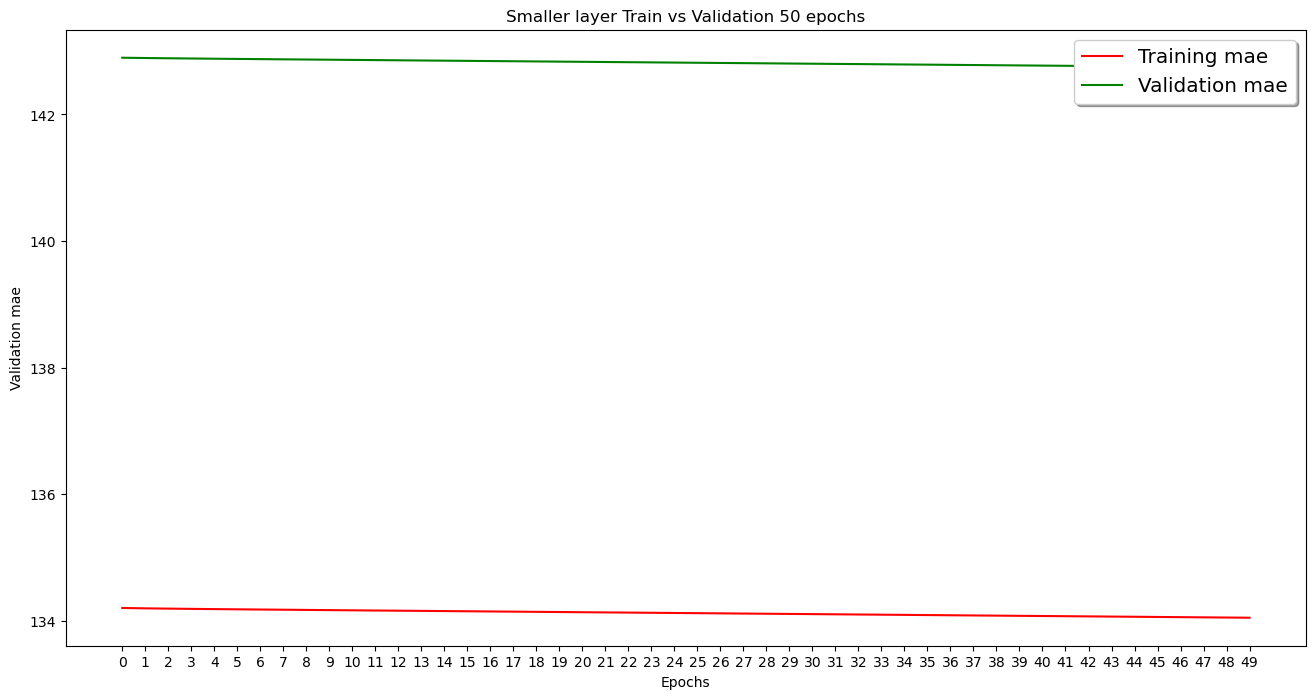

6/6 [==============================] - 0s 2ms/step
Smaller layer test MSE:  26159.457974993064


In [259]:
def smaller_model():
    model = models.Sequential()
    model.add(layers.Dense(1, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

smallermodel = smaller_model()
smallerResult = train_Model(smallermodel,50) #train the model with 50 epochs
plot_mae(smallerResult,50,"Smaller layer Train vs Validation 50 epochs") #plot the mae of the model
smallermodelMSE = mean_squared_error(y_test, smallermodel.predict(x_test))
print("Smaller layer test MSE: ", smallermodelMSE)

<table>
  <tr>
    <th>Model Name</th>
    <th>Number of Layers</th>
    <th>Hidden Layers</th>
    <th>Output Layer</th>
    <th>Activation Function</th>
    <th>Loss Function</th>
    <th>Optimizer</th>
    <th>Epochs</th>
    <th>Test prediction mse(2dp)</th>
    <th>Nuerons in each layer</th>
  </tr>
  <tr>
    <td>Baseline</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>12.00</td>
    <td>64,64,1</td>
  </tr>
  <tr>
    <td>Early stop</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>10</td>
    <td>4.54</td>
    <td>64,64,1</td>
  </tr>
  <tr>
    <td>Reduce layers</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>10.21</td>
    <td>64,1</td>
  </tr>
  <tr>
    <td>Reduce layers and early stop</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>21</td>
    <td>10.13</td>
    <td>64,1</td>
  <tr>
    <td>Increase layers</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>24.00</td>
    <td>64,64,64,1</td>
  </tr>
  <tr>
    <td>Increase layers early stop</td>
    <td>4</td>
    <td>3</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>6</td>
    <td>2.21</td>
    <td>64,64,64,1</td>
  </tr>
  <tr>
    <td>Large network</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>15</td>
    <td>3.67</td>
    <td>512,64,1</td>
  </tr>
  <tr>
    <td>Reduce neurons in first hidden layers</td>
    <td>3</td>
    <td>2</td>
    <td>1</td>
    <td>relu, linear</td>
    <td>mean_squared_error</td>
    <td>rmsprop</td>
    <td>500</td>
    <td>26159.46</td>
    <td>1,64,1</td>
</table>

The table shows that by reducing the first layer number of neurons to 1, the performance significantly decreased, performing almost all the models with a test prediction mse of 26159.46. This is a significant decrease from the baseline model from 12.00 to 26159.46, even worse than the baseline model. This can also be seen in the graph above, where the model cannot learn anything from the data because validation and training are parallel to each other.

<h3> Conclusion </h3>

--------------------
This assignment aims to build and experiment with multiple neural network models to predict future Tesla stock high prices. I have experimented with different number configurations in many layers, hidden layers, epochs and neurons in each layer with the same output layer, activation function, and optimizer and then tested against the test set to find the best performance model.

The best model was the Increase layers early stop model with four layers, three hidden layers, one output layer, relu, linear activation function, mean_squared_error loss function, rmsprop optimizer, 6 epochs, 64,64,64,1 neurons in each layer and test prediction mse of 2.21. It is significantly better than the baseline model, which was implemented as a benchmark to compare the performance of the other models. The significant improvement from 12.00 to 2.21, close to 81.58% (1-2.21/12.00*100%).

The model can predict the future Tesla stock's high price with a mean squared error of 2.21. This is an excellent model to predict the future Tesla stock high price. However, the current model cannot predict what financial experts are looking for, meaning time sequence and the ability to predict prices three/sevens days in advance. That is why the current model performs too well.

In the future, I will improve the model by experimenting with different activation and loss functions testing against various optimizers and introducing learning rates to see how the model will react and perform. I will find the most efficient number of layers and sizes and the best number of epochs to produce the best model possible using the same methodology and technics with Long Term Short Memory (LTSM).LSTM is a Recurrent Neural Network (RNN) used to predict time sequence data.